In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

#from mnist import mnist_load_data
#(Xtrain, ytrain), (Xtest, ytest) = mnist_load_data()
print('train: ', Xtrain.shape)
print('Test: ', Xtest.shape)

Using TensorFlow backend.


train:  (60000, 28, 28)
Test:  (10000, 28, 28)


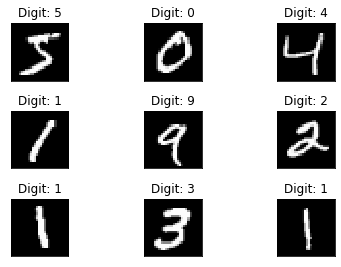

In [3]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(ytrain[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [3]:
x_train_normalized = Xtrain / 255.0

## KNN:


### Using whole Data

In [4]:
from keras.utils import to_categorical
num_classes = 10
ytrain_catW = to_categorical(ytrain, num_classes)
ytest_catW = to_categorical(ytest, num_classes)

In [75]:
%%time
clf = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
clf.fit(Xtrain.reshape(-1,28*28),ytrain_catW)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [76]:
%%time
y_pred = clf.predict(Xtest.reshape(-1,28*28))

Wall time: 26min 2s


In [77]:
%%time
score = clf.score(Xtest.reshape(-1,28*28), ytest_catW)
print("accuracy=%.2f%%" % (score * 100))

accuracy=96.91%
Wall time: 25min 14s


In [78]:
print(classification_report(ytest_catW, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 samples avg       0.97      0.97      0.97     10000



Since for whole data set it was taking a lot of computation time I was not able to play with different values of k. So in order to find the best value I took sample dataset and tried applied KNN with different values of k

### Using small sample from data 

In [34]:
# Sample a smaller dataset for testing
np.random.seed(42)
rand_idx = np.random.choice(Xtrain.shape[0], 10000)
x_train = x_train_normalized[rand_idx]
y_train = ytrain[rand_idx]
x_train.shape, y_train.shape

((10000, 28, 28), (10000,))

In [35]:
# nsamples, nx, ny = Xtrain.shape
d2_Xtrain = x_train.reshape(-1,28*28)

In [36]:
# nsamples, nx, ny = Xtest.shape
d2_Xtest = Xtest.reshape(-1, 28*28)

In [37]:
ytrain_cat = to_categorical(y_train,num_classes)
ytest_cat = to_categorical(ytest,num_classes)
ytrain_cat.shape, ytest_cat.shape

((10000, 10), (10000, 10))

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
clf = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
clf.fit(d2_Xtrain,ytrain_cat)

# kVals = range(1, 15, 2)
# accuracies = []
 
# # loop over various values of `k` for the k-Nearest Neighbor classifier
# for k in range(1, 15, 2):
# # train the k-Nearest Neighbor classifier with the current value of `k`
#     model = KNeighborsClassifier(n_neighbors=k)
#     model.fit(x_train.reshape(-1, 28*28), y_train)
 
#     # evaluate the model and update the accuracies list
#     score = model.score(Xtest.reshape(-1,28*28), ytest)
#     print("k=%d, accuracy=%.2f%%" % (k, score * 100))
#     accuracies.append(score)
 
# #find the value of k that has the largest accuracy
# i = int(np.argmax(accuracies))
# print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
#     accuracies[i] * 100))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [42]:
y_pred = clf.predict(d2_Xtest)

In [43]:
score = clf.score(d2_Xtest, ytest_cat)
print("accuracy=%.2f%%" % (score * 100))

accuracy=64.28%


In [44]:
print(classification_report(ytest_cat, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.96      0.60       980
           1       1.00      0.85      0.92      1135
           2       0.93      0.58      0.71      1032
           3       0.57      0.58      0.58      1010
           4       0.98      0.44      0.61       982
           5       0.82      0.37      0.51       892
           6       0.91      0.70      0.79       958
           7       0.97      0.64      0.77      1028
           8       0.34      0.86      0.49       974
           9       0.79      0.40      0.53      1009

   micro avg       0.64      0.64      0.64     10000
   macro avg       0.78      0.64      0.65     10000
weighted avg       0.78      0.64      0.66     10000
 samples avg       0.64      0.64      0.64     10000



## Random Forest

### With entire Data

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
clf = RandomForestClassifier(
 n_estimators=100)

In [31]:
%%time
clf.fit(Xtrain.reshape(-1,28*28), ytrain_catW)

Wall time: 2min


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
%%time
predicted = clf.predict(Xtest.reshape(-1,28*28))

Wall time: 1.4 s


In [33]:
%%time
print("Accuracy: ", accuracy_score(ytest_catW, predicted))

Accuracy:  0.9031
Wall time: 15.6 ms


### RF parameter tuning on sample data

In [92]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [110]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(d2_Xtrain, ytrain_cat)

Thr grid search method didn't work on both full set of data or on a sample set. So I manually plugged in certain values for the parameters but the default parameter was giving the best result

## SVM on sample data

Since SVM didn't stop processing on full dataset even after hours of training I had to force stop it and switched to sample dataset 

In [30]:
from sklearn import svm, metrics

In [37]:
classifier = svm.SVC(C=1, gamma='auto', kernel = 'linear')
classifier.fit(x_train.reshape(-1, 28*28), y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_predicted = classifier.predict(Xtest.reshape(-1, 28 * 28))

In [40]:
cm = metrics.confusion_matrix(ytest, y_predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(ytest, y_predicted)))

Confusion matrix:
[[ 974    0    0    1    0    0    2    1    2    0]
 [   0 1071    3    3    0    0    3    0   54    1]
 [  26   14  833   20   10    2   16    2  109    0]
 [  25    1   19  850    2    2    6    0  103    2]
 [   5    0    6    2  920    0    6    0   33   10]
 [ 114    9    5  138   20  210   14    3  364   15]
 [  47    2   11    1   15    1  858    0   23    0]
 [  11    5   27   86   24    0    2  777   68   28]
 [  17    2    2   11    3    0    6    0  933    0]
 [  10    2    7   11   89    0    0    9   91  790]]
Accuracy=0.8216


### PCA

Since taking random sample of data for model building was not that efficient way I thought reducing the dimension of whole data, so I applied PCA and fitted this data on SVM. Even though it improved the performance speed the accuracy was not upto the mark

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_train_10D = pca.fit(x_train.reshape(-1, 28 * 28))
pca.explained_variance_ratio_


array([0.09613498, 0.07215232, 0.0613715 , 0.05412347, 0.04890231,
       0.04446166, 0.03294931, 0.02907621, 0.02776377, 0.02401076])

In [43]:
x_train_reduced = pca.transform(x_train.reshape(-1, 28 * 28))
classifier.fit(x_train_reduced, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_predicted = classifier.predict(pca.transform(Xtest.reshape(-1, 28 * 28)))

In [45]:
cm = metrics.confusion_matrix(ytest, y_predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(ytest, y_predicted)))

Confusion matrix:
[[956   0   3   8   0   0   1   0  12   0]
 [  0 615  59   3   0   0   6   0 452   0]
 [ 46   0 865   9  13   0  24   3  72   0]
 [ 28   0  13 807   3   2   2   5 148   2]
 [ 18   0  24   4 781   0  16   1  39  99]
 [200   0  17 192  13  31  17   0 399  23]
 [ 53   0  79   1   9   3 782   0  31   0]
 [ 25   0  52  29   7   0   0 773  80  62]
 [ 13   0  10  25   8   0   5   2 906   5]
 [ 30   0  38  34 238   0   2  18 162 487]]
Accuracy=0.7003


## CNN 

The final method that I choosed was CNN which gave the best result among all other models and also was quite fast based on computation

In [86]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], 28, 28, 1)
Xtest = Xtest.reshape(Xtest.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
Xtrain /= 255
Xtest /= 255
print('x_train shape:', Xtrain.shape)
print('Number of images in x_train', Xtrain.shape[0])
print('Number of images in x_test', Xtest.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [87]:
# Importing the required Keras modules containing model and layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [88]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=Xtrain,y=ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2079 - accuracy: 0.9364
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0837 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0585 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0457 - accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0381 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0309 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0249 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0234 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0203 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [89]:
model.evaluate(Xtest, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0614 - accuracy: 0.9859


[0.061417799443006516, 0.9858999848365784]

4


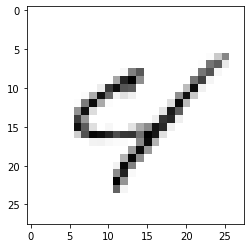

In [90]:
image_index = 420
plt.imshow(Xtest[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(Xtest[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

## Comparison

|  | KNN | RF | SVM on sample | CNN |
| --- | --- | --- | --- | --- |
| Accuracy | .96 | .90 | .82 | .98 |

## Conclusions and Perspectives:

...

**From all of the above algorithms CNN gave the best result because of convolutional neural network's ablility to process the images much more efficiently and also do the computations pretty much quicker on images. The other algorithms performed very well comparitively but it was much slower based on computation. SVM was taking too long for me and since my computational power was low I had to switch to use sample data set. And I first tried with 'rbf' as my kernel and the accuracy was very low and 'linear' performed better.**

**Since random sampling the dataset to check the performance was not an efficient method I thought of applying PCA inorder to reduce the dimension which helps to have fast computation. But even though PCA helped to speed up processing the accuracy was not upto the mark**

**Randomforest did work with the whole dataset without requirements of much processing time. But the accuracy was pretty less compare to KNN. Hyperparameter tunning was also taking a lot of time on whole dataset and I had play with different values for each parameters manually and check the performance**

**There are a lot to learn on how deep an algorithm can be optimized and this project helped me to have a kickstart on how to learn that. 
While bulding each algorithm I played with the different parameters by giving different values and checking the most optimal one. For some it was not feasible since it took a long run time. So doing this helped me understand more about the hyper parameters and tuning them according to the model performance.**